Durchschnittlicher Trinkgeldbetrag: 3.00 $
Durchschnittlicher Gesamtbetrag der Rechnung: 19.79 $
Durchschnittlicher Trinkgeldprozentsatz: 16.1 %
       avg_tip  avg_total_bill    tip_pct  count
day                                             
Thur  2.771452       17.682742  15.673201     62
Fri   2.734737       17.151579  15.944519     19
Sat   2.993103       20.441379  14.642375     87
Sun   3.255132       21.410000  15.203791     76


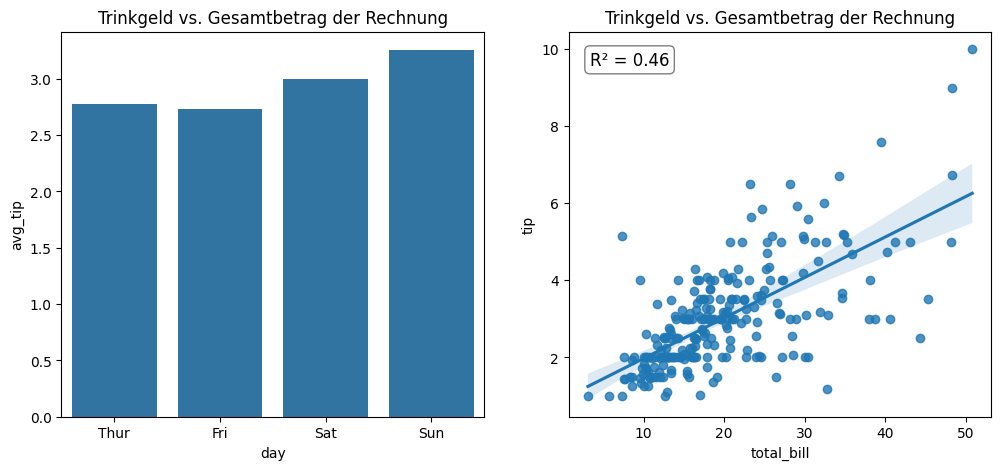

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#  Datensatz laden

df = sns.load_dataset("tips")
#print(df.head())

#  Grundlegende Analyse der Trinkgeldbeträge
avg_tip = df["tip"].mean()
avg_total_bill = df["total_bill"].mean()

tip_pct = (df["tip"] / df["total_bill"]) * 100
avg_tip_pct = tip_pct.mean()

print(f"Durchschnittlicher Trinkgeldbetrag: {avg_tip:.2f} $")
print(f"Durchschnittlicher Gesamtbetrag der Rechnung: {avg_total_bill:.2f} $")
print(f"Durchschnittlicher Trinkgeldprozentsatz: {avg_tip_pct:.1f} %")

#  Korrelation zwischen Trinkgeld und Gesamtbetrag der Rechnung
r, p = stats.pearsonr(df["total_bill"], df["tip"])
r2 = r**2
text_r2 = f"R² = {r2:.2f}"

# Daten nach Tagen filtern
summary_df = df.groupby("day", observed=True).agg(
    avg_tip=("tip", "mean"),
    avg_total_bill=("total_bill", "mean"),
    tip_pct=("tip", lambda x: (x.sum() / df.loc[x.index, "total_bill"].sum()) * 100),
    count=("tip", "size")
)

print(summary_df)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))


sns.barplot(data=summary_df, x="day", y="avg_tip", ax=ax[0])
ax[0].set_title("Trinkgeld vs. Gesamtbetrag der Rechnung")


#  Regressionplot erstellen
sns.regplot(x="total_bill", y="tip", data=df, ax=ax[1], order=1, ci=95)
ax[1].set_title("Trinkgeld vs. Gesamtbetrag der Rechnung")
ax[1].text(0.05, 0.95, text_r2, transform=ax[1].transAxes, fontsize=12, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()
